In [2]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [3]:
!pip install keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.9 MB/s eta 0:00:00


In [4]:
!pip install scikeras

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.layers import Input, Dense
from keras import models
from tensorflow.keras import layers
import kerastuner as kt
from kerastuner.tuners import RandomSearch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from keras.models import Model
from keras.layers import Input, Dense
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
from keras import regularizers
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




<ipython-input-5-cdc82959f596>:18: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


**STEP 1: READ THE DATASET AND CLEAN IT**

In [6]:
#Read the file
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/CustomerChurn_dataset.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [7]:
#Drop useless columns such as the customerID.
df.drop("customerID", axis=1, inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [8]:
#Convert non-numeric values such as Totalcharge to numeric.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [9]:
#Identify columns with categorical values.
Categorical_values = df.select_dtypes(include=['object', 'category']).columns
Categorical_values

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [10]:
#Encode the categorical columns to 0's and 1's

for column in Categorical_values:
 df[column], _ = pd.factorize(df[column])
encoded_columns = df[Categorical_values]
encoded_columns

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,1,0,1,1,1,0,0,0,1,1,1,0
2,1,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1
3,1,1,0,0,0,0,1,1,1,1,0,0,1,1,2,0
4,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,2,0,1,1,1,1,1,1,1,0,1,0
7039,0,0,1,1,2,1,0,0,1,0,1,1,1,0,3,0
7040,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
7041,1,0,0,1,2,1,0,1,0,0,0,0,0,0,1,1


**STEP 2: EXTRACT FILE FEATURES THAT CAN DEFINE A CUSTOMER CHURN:****

In [11]:
# Calculate the correlation matrix (CustomerChurn dataset)
correlation_matrix_customer = encoded_columns.corr()

# Number of top features to select
N = 17

# Getting the top N features with the highest absolute correlation with 'Churn'
top_correlated_features = correlation_matrix_customer['Churn'].abs().nlargest(N + 1).index

# Remove 'Churn' from the list of top correlated features
top_correlated_features = top_correlated_features.drop('Churn')

# Creating a feature subset with the selected top features (the independent variables)
feature_subset = encoded_columns[top_correlated_features]


# Define the dependent variable which is 'Churn'
dependent_variable = encoded_columns['Churn']

In [12]:
#Display the top correlated features.
top_correlated_features

Index(['Contract', 'OnlineSecurity', 'TechSupport', 'DeviceProtection',
       'PaymentMethod', 'StreamingMovies', 'StreamingTV', 'PaperlessBilling',
       'Dependents', 'Partner', 'OnlineBackup', 'InternetService',
       'MultipleLines', 'PhoneService', 'gender'],
      dtype='object')

In [13]:
# Concatenate the encoded categorical variables with numeric data to the full list of independent variables.
numerical_columns = ['MonthlyCharges', 'TotalCharges']
feature_subset_conc_data = pd.concat([encoded_columns[top_correlated_features], df[numerical_columns]], axis=1)
feature_subset_conc_data

,Contract,OnlineSecurity,TechSupport,DeviceProtection,PaymentMethod,StreamingMovies,StreamingTV,PaperlessBilling,Dependents,Partner,OnlineBackup,InternetService,MultipleLines,PhoneService,gender,MonthlyCharges,TotalCharges
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,29.85,29.85
1,1,1,0,1,1,0,0,1,0,1,1,0,1,1,1,56.95,1889.50
2,0,1,0,0,1,0,0,0,0,1,0,0,1,1,1,53.85,108.15
3,1,1,1,1,2,0,0,1,0,1,1,0,0,0,1,42.30,1840.75
4,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,1,1,1,0,1,0,1,0,2,1,1,84.80,1990.50
7039,1,0,0,1,3,1,1,0,1,0,0,1,2,1,0,103.20,7362.90
7040,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,29.60,346.45
7041,0,0,0,0,1,0,0,0,0,0,1,1,2,1,1,74.40,306.60


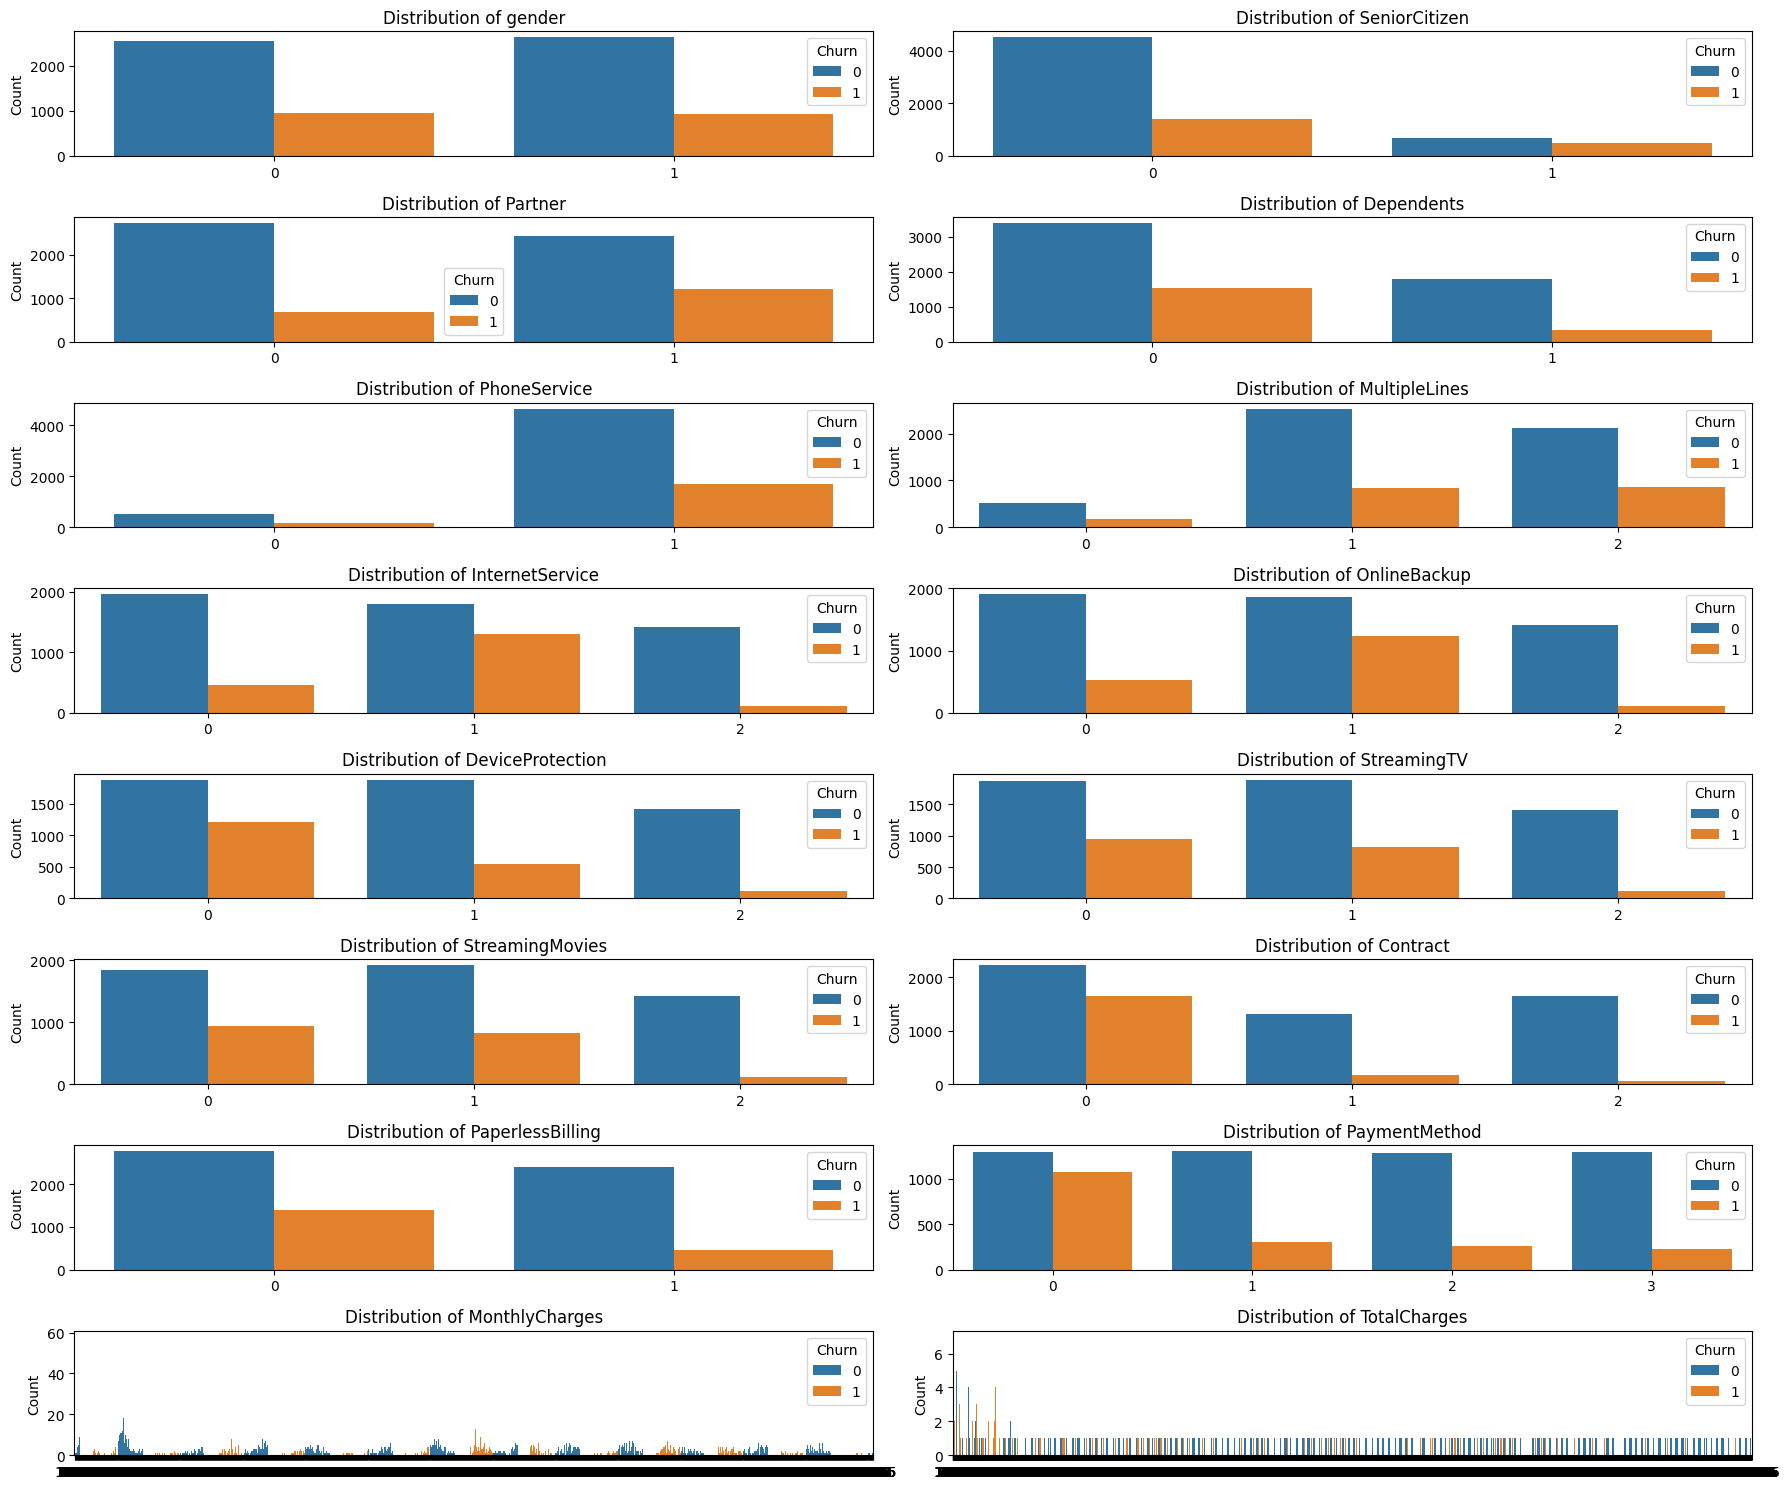

In [113]:
#Visualization of all categorical and independent variables against Churn Rate.

#categorical variables:
feature_subset_conc_data = ['gender', 'SeniorCitizen', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
                      'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                      'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

analysis_data = df[feature_subset_conc_data]


plt.figure(figsize=(18, 15))
for i, column in enumerate(analysis_data.columns[:-1]):
    plt.subplot(8, 2, i + 1)
    sns.countplot(x=column, hue='Churn', data=analysis_data)
    plt.title(f'Distribution of {column}')
    plt.xlabel('')
    plt.ylabel('Count')

plt.tight_layout()
plt.show()




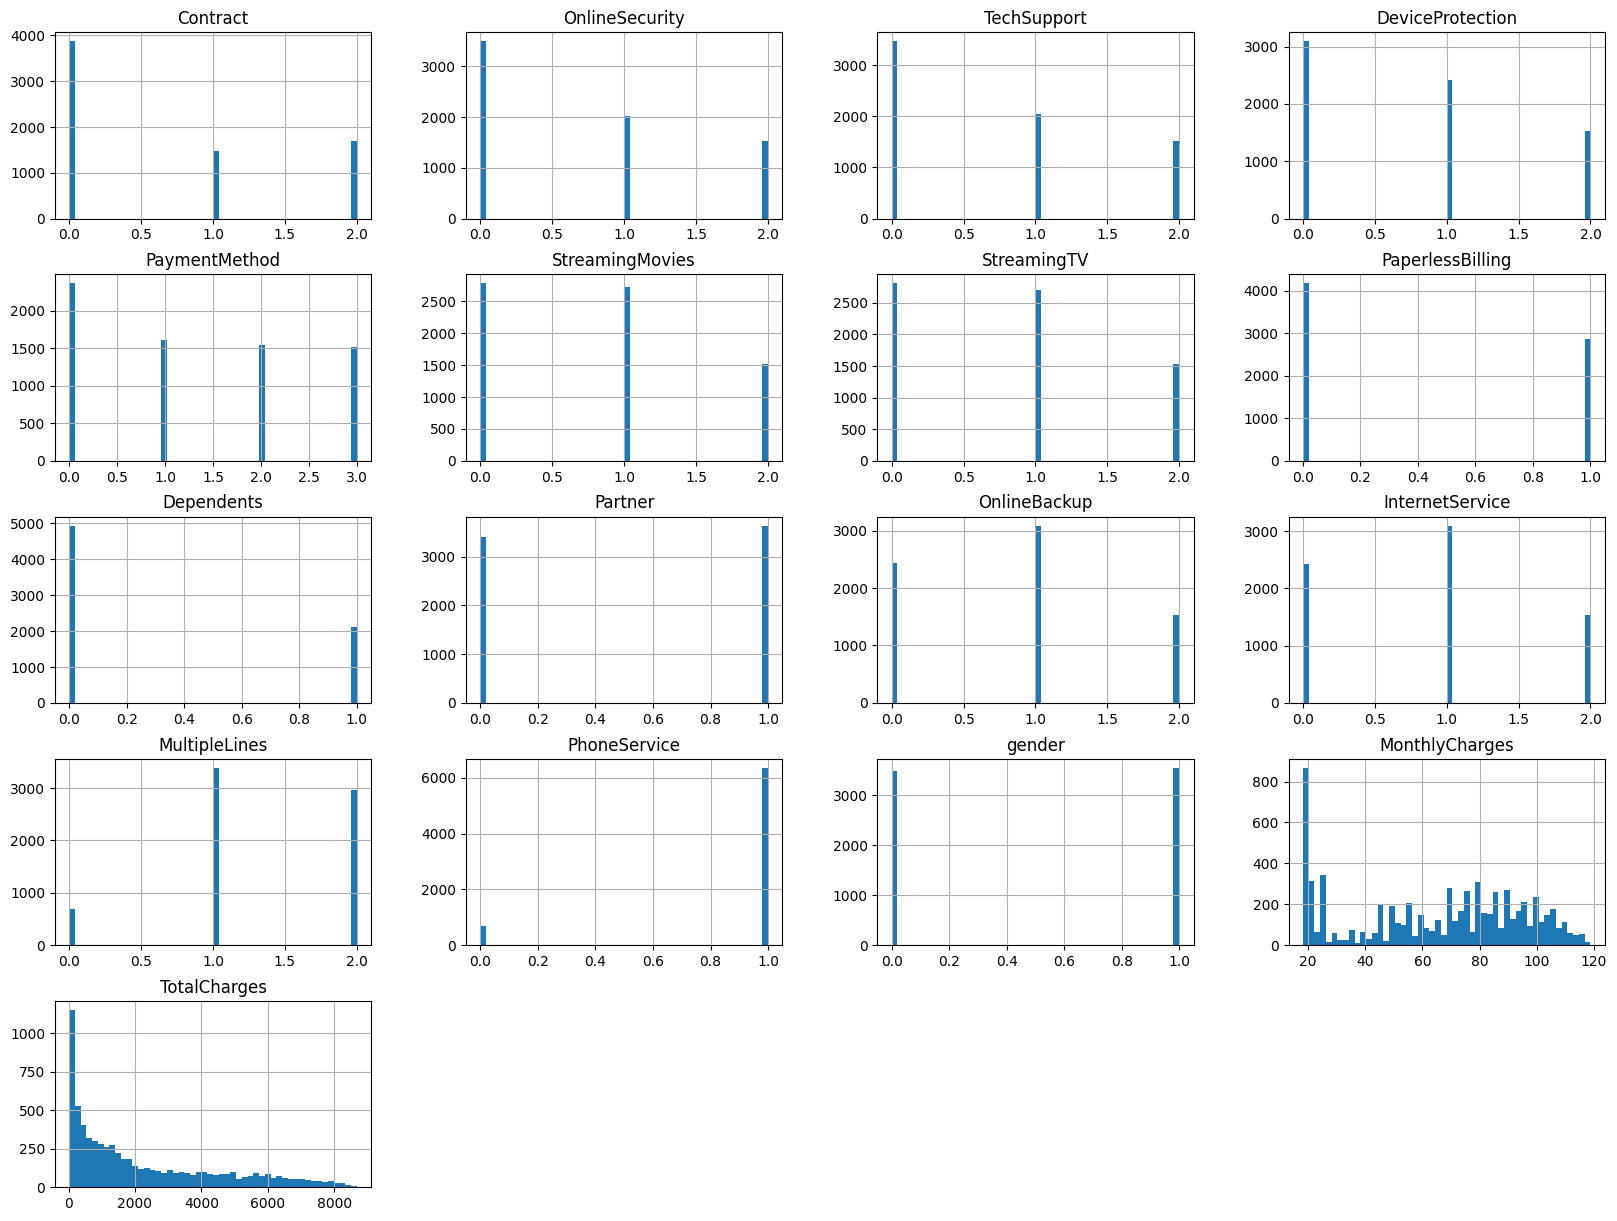

In [14]:
#Data Visualization for the categorical variables
feature_subset_conc_data.hist(bins=50, figsize=(20,15))
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


#Scaling independent variables
columns_to_scale = top_correlated_features
scaled_data = feature_subset_conc_data[columns_to_scale]

# Create an instance of the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the selected columns
scaled_data = scaler.fit_transform(scaled_data)


  # Replace the original columns with the scaled data in the DataFrame
feature_subset_conc_data[columns_to_scale] = scaled_data
scaled_data

array([[-0.8282069 , -0.90358933, -0.90917198, ..., -2.06166944,
        -3.05401039, -1.00955867],
       [ 0.37127103,  0.35138595, -0.90917198, ..., -0.50569667,
         0.32743831,  0.99053183],
       [-0.8282069 ,  0.35138595, -0.90917198, ..., -0.50569667,
         0.32743831,  0.99053183],
       ...,
       [-0.8282069 ,  0.35138595, -0.90917198, ..., -2.06166944,
        -3.05401039, -1.00955867],
       [-0.8282069 , -0.90358933, -0.90917198, ...,  1.05027609,
         0.32743831,  0.99053183],
       [ 1.57074896,  0.35138595,  0.34736221, ..., -0.50569667,
         0.32743831,  0.99053183]])

**STEP 3: USE YOUR EDA(EXPLORATORY DATA ANALYSIS) SKILLS TO FIND OUT WHICH CUSTOMER PROFILES RELATE TO CHURNING A LOT.**

In [16]:
#feature_subset represents the independent variables.
#Obtaining x and y values
y_values = encoded_columns['Churn']
x_values = feature_subset[top_correlated_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42)
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**STEP 4: USING THE FEATURES IN (1) DEFINE AND TRAIN A MULTI-LAYER PERCEPTRON MODEL USING THE FUNCTIONAL API**


In [25]:
def create_keras_model(optimizer = 'adam', hidden_layer_1_unit = 32, hidden_layer_2_unit = 16):
    input_layer = Input(shape=15,)
    # Define hidden layers with the specified number of units (neurons) and activation functions
    hidden_layer_1 = Dense(hidden_layer_1_unit, activation='relu')(input_layer)
    hidden_layer_2 = Dense(hidden_layer_2_unit, activation='relu')(hidden_layer_1)

    output_layer = Dense(1, activation='sigmoid')(hidden_layer_2)

    model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create a KerasClassifier based on your function
keras_model = KerasClassifier(model=create_keras_model,epochs=10, batch_size=32, verbose=0, hidden_layer_1_unit = 32, hidden_layer_2_unit = 16)

# Define hyperparameters for grid search
param_grid = {
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'hidden_layer_1_unit': [32, 64, 128],
    'hidden_layer_2_unit': [16, 32, 64],
}


**USING GRIDSEARCH TO FIND THE OPTIMAL PARAMETERS**

In [27]:
# Use GridSearchCV to find the optimal hyperparameters
grid = GridSearchCV(estimator=keras_model, param_grid=param_grid, scoring='roc_auc', cv=3, error_score='raise')
grid_result = grid.fit(X_train, y_train)

# Get the best parameters
best_params = grid_result.best_params_

# Display the results
print(f"Best Parameters: {best_params}")


Best Parameters: {'hidden_layer_1_unit': 32, 'hidden_layer_2_unit': 32, 'optimizer': 'sgd'}


**STEP 5: EVALUATE THE MODEL’S ACCURACY AND CALCULATE THE AUC SCORE**

In [28]:
from sklearn.metrics import accuracy_score, roc_auc_score

# Get the best parameters
best_params = grid_result.best_params_

# Create a new KerasClassifier with the best parameters
best_keras_model = KerasClassifier(model=create_keras_model, **best_params, epochs=10, batch_size=32, verbose=0)

# Train the model with the best parameters
best_keras_model.fit(X_train, y_train)

# Predict on the test set
y_pred = best_keras_model.predict(X_test)

# Evaluate accuracy and AUC score
accuracy = accuracy_score(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"AUC Score: {auc_score}")



Accuracy: 0.794180269694819
AUC Score: 0.6824621921806908


**OPTIMIZING WITH THE BEST PARAMETERS TO GET THE FINAL ACCURACY AND AUC SCORES**

In [33]:
from sklearn.metrics import accuracy_score, roc_auc_score
from tensorflow.keras.optimizers import SGD

input_layer = Input(shape=19,)
# Define hidden layers with the specified number of units (neurons) and activation functions
hidden_layer_1 = Dense(64, activation='relu')(input_layer)
hidden_layer_2 = Dense(32, activation='relu')(hidden_layer_1)
output_layer = Dense(1, activation='sigmoid')(hidden_layer_2)

Opt_model = Model(inputs=input_layer, outputs=output_layer)

    # Compile the model
Opt_model.compile(optimizer= SGD(), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model with the best parameters
Opt_model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Predict on the test set
y_pred_optimized = best_keras_model.predict(X_test)
y_pred_opt_binary=(y_pred > 0.5).astype(int)

# Evaluate accuracy and AUC score
accuracy = accuracy_score(y_test,  y_pred_opt_binary)
auc_score = roc_auc_score(y_test, y_pred_optimized)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"AUC Score: {auc_score}")

Epoch 1/10


ValueError: ignored

**SAVING THE MODEL**

In [32]:
import pickle

# Save the model
with open('Customer_Churn_Model.pkl', 'wb') as file_name:
    pickle.dump(best_keras_model, file_name)

In [31]:
import pickle
with open('scaler.pkl', 'wb') as scaler_file:
  pickle.dump(scaler, scaler_file)